# TensorFlow Datasets

TensorFlow Datasets (TFDS) provide a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks. It handles downloading and preparing the data deterministically and constructing a tf.data.Dataset (or np.array).

Don't confuse TFDS (this library) with tf.data (TensorFlow API to build efficient data pipelines). TFDS is a high level wrapper around tf.data.

The following resources contains basic information on TFDS:

https://www.tensorflow.org/datasets/overview

# Import **tensorflow** Library

Import tensorflow library and alias as **tf**:

In [1]:
import tensorflow as tf

# GPU Hardware Accelerator

To vastly speed up processing, we can use the GPU available from the Google Colab cloud service. Colab provides a free Tesla K80 GPU of about 12 GB. It’s very easy to enable the GPU in a Colab notebook:

1.	click **Runtime** in the top left menu
2.	click **Change runtime** type from the drop-down menu
3.	choose **GPU** from the Hardware accelerator drop-down menu
4.	click **SAVE**

# Test if GPU is Active

In [2]:
tf.__version__, tf.test.gpu_device_name()

('2.4.1', '/device:GPU:0')

If '/device:GPU:0' is displayed, the GPU is active. If '..' is displayed, the regular CPU is active.

# Find Available Datasets

All dataset builders are subclass of tfds.core.DatasetBuilder. To get the list of available builders, use tfds.list_builders()

In [3]:
import tensorflow_datasets as tfds

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

Get number of datasets:

In [4]:
len(tfds.list_builders())

224

To get a breakdown of the datasets, consult the following URL:

https://www.tensorflow.org/datasets/catalog/overview

# Load a Dataset

All builders include a **tfds.core.DatasetInfo** object containing the dataset metadata, which is accessed through:

* the tfds.load API
* The tfds.core.DatasetBuilder API

Load MNIST as a TFDS:

In [5]:
ds, info = tfds.load('mnist', split='train',
                     shuffle_files=True,
                     with_info=True,
                     try_gcs=True)
ds

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

tfds.load downloads the data and saves it as **TFRecord** files. It then loads the TFRecord files and creates a tf.data.Dataset. The TFRecord format is a simple format for storing a sequence of binary records.

Some common arguments:

* split - splits data (e.g. 'train', ['train', 'test'], 'train[80%:]',...)
* shuffle_files - controls whether to shuffle the files between each epoch (TFDS store big datasets in multiple smaller files)
* as_supervised - if True, tf.data.Dataset has a 2-tuple structure (input, label). If False, tf.data.Dataset has a dictionary structure
* data_dir - location where the dataset is saved ( defaults to ~/tensorflow_datasets/)
* with_info=True - returns the tfds.core.DatasetInfo containing dataset metadata
* download=False - disables download

**tfds.load** is a thin wrapper around tfds.core.DatasetBuilder. You can get the same output using the tfds.core.DatasetBuilder API.

The **MNIST** database is a large database of handwritten digits that is widely used for training and testing in the field of machine learning.

# Metadata

In [6]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

MNIST contains 60,000 28 x 28 feature images for training and 10,000 28 x 28 feature images for testing. Both train and test sets have corresponding labels.

# Iterate Over a Dataset

## As dict

By default, the tf.data.Dataset object contains a dict of tf.Tensors.

Take a single training example:

In [7]:
ds = ds.take(1)
ds

<TakeDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

Example is in the form:

 **{'image': tf.Tensor, 'label': tf.Tensor}**

Display:

In [8]:
for example in ds:
  print ('keys:', list(example.keys()))
  image = example['image']
  label = example['label']
  print ('shapes:', image.shape, label)

keys: ['image', 'label']
shapes: (28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)


## As tuple (as_supervised=True)

By using as_supervised=True, we get a tuple (features, label) for supervised datasets.

In [9]:
ds = tfds.load('mnist', split='train', as_supervised=True,
               try_gcs=True)
ds = ds.take(1)

for image, label in ds:
  print (image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


We display by tuple pair - image, label.

## As numpy (tfds.as_numpy)

Uses tfds.as_numpy to convert:

* tf.Tensor -> np.array
* tf.data.Dataset -> Generator[np.array]

Load train data:

In [10]:
ds = tfds.load('mnist', split='train', as_supervised=True,
               try_gcs=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print (type(image), type(label), label)
  print (image.shape)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4
(28, 28, 1)


We loaded train data directly as a TFDS. We then converted it to numpy.

If we wish to load the entire dataset as numpy arrays:

In [11]:
image_train, label_train = tfds.as_numpy(
    tfds.load('mnist', split='train',
              batch_size=-1, as_supervised=True,
              try_gcs=True))

type(image_train), image_train.shape

(numpy.ndarray, (60000, 28, 28, 1))

By using batch_size=-1, the full dataset is loaded in a single batch. The batch is then converted to NumPy arrays.

Be careful that your dataset can fit in memory and that all examples have the same shape.

### Inspect

Since the dataset consists of NumPy arrays, we can inspect it with normal Python operations.

Get number of examples:

In [12]:
len(list(image_train))

60000

Inspect the first example:

In [13]:
image_train[0].shape, label_train[0]

((28, 28, 1), 4)

Inspect a few examples:

In [14]:
for row in range(3):
  print (image_train[row].shape, label_train[row])

(28, 28, 1) 4
(28, 28, 1) 1
(28, 28, 1) 0


# Visualization

We can conveniently visualize images from a TFDS. 

## tfds.as_dataframe

To visualize image data, tf.data.Dataset objects can be converted to a pandas.DataFrame object:

* add the tfds.core.DatasetInfo object as the second argument of the tfds.as_dataframe objet to visualize images, audio, texts, videos, and so on.
* use ds.take(n) to display the first n examples.

In [15]:
ds, info = tfds.load('mnist', split='train', with_info=True,
                     try_gcs=True)

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


## Take Examples

We can take some examples and visualize.

Take some examples:

In [16]:
import matplotlib.pyplot as plt

images = []
for example in ds.take(4):
  img = tf.squeeze(example['image'])
  images.append(img)

Take 4 examples, squeeze out the '1' dimension from each tensor, and add the squeezed tensors to an array.

Visualize:

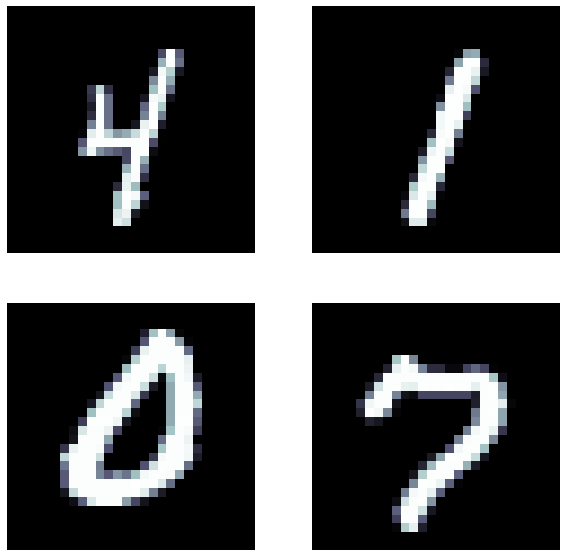

In [17]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i + 1)
  plt.imshow(images[i], cmap='bone')
  plt.axis('off')

## tfds.show_examples

Only image datasets are supported.

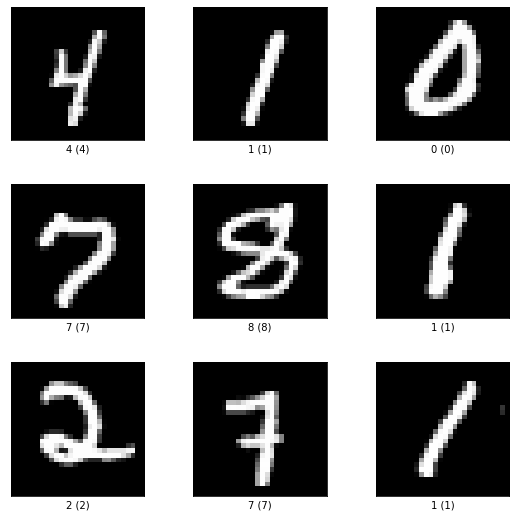

In [18]:
fig = tfds.show_examples(ds, info)

# Load Fashion-MNIST

Load Fashion-MNIST as a TFDS. **Fashion-MNIST** is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. The dataset is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

Load the dataset:

In [19]:
fashion, fashion_info = tfds.load(
    'fashion_mnist',
    split='train',
    with_info=True,
    shuffle_files=True,
    as_supervised=True,
    try_gcs=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete74ZASX/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete74ZASX/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


It's always a good idea to shuffle as much as possible!

## Take an Example

Take one example and display image shape and label value:

In [20]:
for image, label in fashion.take(1):
  print (image.shape, label)

(28, 28, 1) tf.Tensor(2, shape=(), dtype=int64)


## Inspect Data

Display basic information about the dataset:

In [21]:
fashion

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

## Display info Object

View the contents of the **info** object:

In [22]:
fashion_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

From the info object, we can see a lot of information about the dataset. A very important one is how the data is split. In this case, the data is already split into train and test sets.

## Show Examples

Display some example with the **show_examples** function:

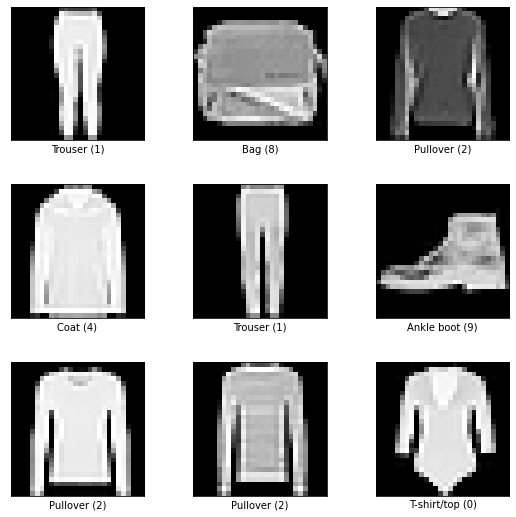

In [23]:
fig = tfds.show_examples(fashion, fashion_info)

Nine examples are displayed along with their class labels by integer and name.

Display examples with **as_dataframe**:

In [24]:
tfds.as_dataframe(fashion.take(4), info)

,image,label
0,,2
1,,1
2,,8
3,,4


The first example from the dataset contains a 28 x 28 x 1 image with a corresponding label of 2.

Take some examples and visualize:

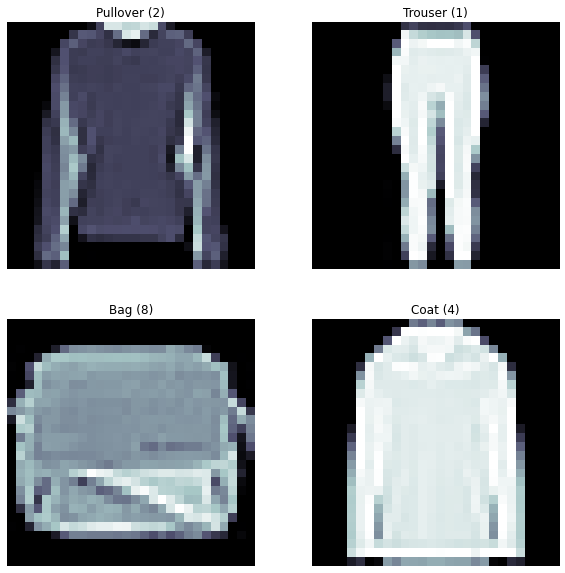

In [26]:
classes = fashion_info.features['label'].names
images, labels = [], []
for image, label in fashion.take(4):
  img = tf.squeeze(image)
  images.append(img), labels.append(label)

rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i + 1)
  plt.imshow(images[i], cmap='bone')
  t = classes[labels[i]] + ' (' +\
      str(labels[i].numpy()) + ')'
  plt.title(t)
  plt.axis('off')

## Display Metadata (label names, image shape,...)

Access the tfds.features.FeatureDict:

In [27]:
fashion_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

Number of classes:

In [28]:
num_classes = fashion_info.features['label'].num_classes
num_classes

10

Class names:

In [29]:
classes = fashion_info.features['label'].names
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Shapes, dtypes:

In [30]:
print (fashion_info.features.shape)
print (fashion_info.features.dtype)
print (fashion_info.features['image'].shape)
print (fashion_info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


## Display Split Metadata (e.g. split names, available splits, ...)

Access the tfds.core.SplitDict:

In [31]:
fashion_info.splits

{'test': <tfds.core.SplitInfo num_examples=10000>,
 'train': <tfds.core.SplitInfo num_examples=60000>}

Available splits:

In [32]:
list(fashion_info.splits.keys())

['test', 'train']

Get info on individual split:

In [33]:
print (fashion_info.splits['train'].num_examples)
print (fashion_info.splits['train'].filenames)
print (fashion_info.splits['train'].num_shards)

60000
['fashion_mnist-train.tfrecord-00000-of-00001']
1


# Splitting and Splicing API

All DatasetBuilders expose various data subsets defined as splits (eg: train, test). When constructing a tf.data.Dataset instance using either tfds.load() or tfds.DatasetBuilder.as_dataset(), one can specify which split(s) to retrieve. It is also possible to retrieve slice(s) of split(s) as well as combinations of those.

## Slicing API

Slicing instructions are specified in tfds.load or tfds.DatasetBuilder.as_dataset.

Instructions can be provided as either strings or ReadInstructions. Strings are more compact and readable for simple cases, while ReadInstructions provide more options and might be easier to use with variable slicing parameters.

Note: Due to the shards being read in parallel, order isn't guaranteed to be consistent between sub-splits. In other words reading test[0:100] followed by test[100:200] may yield examples in a different order than reading test[:200].

## Examples using the string API

Full 'train' split:

In [34]:
fashion_train = tfds.load('fashion_mnist', split='train',
                          try_gcs=True)
fashion_train

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

Full 'train' split and the full 'test' split as two distinct datasets:

In [35]:
train_ds, test_ds = tfds.load('fashion_mnist',
                              split=['train', 'test'],
                              try_gcs=True)
train_ds, test_ds

(<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>)

Full 'train' and 'test' splits, **interleaved** together:

In [36]:
train_test_ds = tfds.load('fashion_mnist', split='train+test',
                          try_gcs=True)
train_test_ds

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

From record 100 (included) to record 200 (excluded) of 'train' split.

In [37]:
train_100_200_ds = tfds.load('fashion_mnist',
                             split='train[100:200]',
                             try_gcs=True)

First 25% of 'train' split:

In [38]:
train_25pct_ds = tfds.load('fashion_mnist',
                           split='train[:25%]',
                           try_gcs=True)

First 10% of 'train' + the last 80% of 'train':

In [39]:
train_10_80pct_ds = tfds.load(
    'fashion_mnist', try_gcs=True,
    split='train[:10%]+train[-80%:]')

10-fold cross-validation:

In [40]:
test_cv = tfds.load('fashion_mnist', try_gcs=True,
                    split=[f'train[{k}%:{k+10}%]'
                    for k in range(0, 100, 10)])
train_cv = tfds.load('fashion_mnist', try_gcs=True,
                      split=[f'train[:{k}%]+train[{k+10}%:]'
                      for k in range(0, 100, 10)])

10-fold cross-validation:
* validation datasets are each going to be 10%:
[0%:10%], [10%:20%], ..., [90%:100%].
* training datasets are each going to be the complementary 90%:
[10%:100%] (for a corresponding validation set of [0%:10%]),
[0%:10%] + [20%:100%] (for a validation set of [10%:20%]), ...,
[0%:90%] (for a validation set of [90%:100%]).

## Examples using the ReadInstruction API (equivalent as above):

Full 'train' split:

In [41]:
train_ds = tfds.load('fashion_mnist', try_gcs=True,
                     split=tfds.core.ReadInstruction('train'))

Full 'train' split and full 'test' split as two distinct datasets:

In [42]:
train_ds, test_ds = tfds.load(
    'fashion_mnist', try_gcs=True,
    split=[tfds.core.ReadInstruction('train'),
           tfds.core.ReadInstruction('test')])

Full 'train' and 'test' splits, interleaved together:

In [43]:
ri = tfds.core.ReadInstruction('train')\
     + tfds.core.ReadInstruction('test')
train_test_ds = tfds.load('fashion_mnist',
                          split=ri, try_gcs=True)

From record 100 (included) to record 200 (excluded) of 'train' split:

In [44]:
train_100_200_ds = tfds.load(
    'fashion_mnist',
    split=tfds.core.ReadInstruction(
        'train', from_=100, to=200,
        unit='abs'), try_gcs=True)

First 25% of 'train' split:

In [45]:
train_25_pct_ds = tfds.load(
    'fashion_mnist', try_gcs=True,
    split=tfds.core.ReadInstruction(
        'train', to=25, unit='%'))

First 10% of 'train' to last 80% of train:

In [46]:
ri = (tfds.core.ReadInstruction('train', to=10, unit='%') +
      tfds.core.ReadInstruction('train', from_=-80, unit='%'))
train_10_80pct_ds = tfds.load('fashion_mnist',
                              split=ri, try_gcs=True)

10-fold cross-validation:

In [47]:
tests = tfds.load('fashion_mnist', split=
    [tfds.core.ReadInstruction('train', from_=k,
                               to=k+10, unit='%')
     for k in range(0, 100, 10)], try_gcs=True)
trains = tfds.load('fashion_mnist', split=
    [tfds.core.ReadInstruction('train', to=k, unit='%') +
     tfds.core.ReadInstruction('train', from_=k+10, unit='%')
     for k in range(0, 100, 10)], try_gcs=True)

* validation datasets are each going to be 10%: [0%:10%], [10%:20%], ..., [90%:100%].
* training datasets are each going to be the complementary 90%:
[10%:100%] (for a corresponding validation set of [0%:10%]),
[0%:10%] + [20%:100%] (for a validation set of [10%:20%]), ...,
[0%:90%] (for a validation set of [90%:100%]).

# Performance Tips

## Auto-caching

By default, TFDS auto-caches datasets which satisfy the following constraints:
* total dataset size (all splits) is defined and < 250 MB
* shuffle_files is disabled or only a single shard is read

It is possible to opt out of auto-caching by passing try_autocaching=False to tfds.ReadConfig in tfds.load. Have a look at the dataset catalog documentation to see if a specific dataset will use auto-cache.

Resource:

https://www.tensorflow.org/datasets/performances

## Benchmark Datasets

Use tfds.core.benchmark(ds) to benchmark any tf.data.Dataset object. Make sure to indicate the **batch_size =** to *some value*.

Load and preprocess a dataset:

In [48]:
ds = tfds.load('fashion_mnist', split='train',
               try_gcs=True).batch(32).prefetch(1)

Benchmark:

In [49]:
tfds.core.benchmark(ds, batch_size=32)



************ Summary ************

Examples/sec (First included) 13876.69 ex/sec (total: 60000 ex, 4.32 sec)
Examples/sec (First only) 882.35 ex/sec (total: 32 ex, 0.04 sec)
Examples/sec (First excluded) 13986.61 ex/sec (total: 59968 ex, 4.29 sec)


{'first': {'avg': 882.3483104673576,
  'duration': 0.03626685700010057,
  'num_examples': 32},
 'first+last': {'avg': 13876.693661822535,
  'duration': 4.323796537000135,
  'num_examples': 60000},
 'last': {'avg': 13986.608717773242,
  'duration': 4.287529680000034,
  'num_examples': 59968},
 'raw': {'end_time': 1564.989668484,
  'first_batch_time': 1560.702138804,
  'num_iter': 1875,
  'start_time': 1560.665871947}}

Run a second iteration benchmark:

In [50]:
tfds.core.benchmark(ds, batch_size=32)



************ Summary ************

Examples/sec (First included) 124763.34 ex/sec (total: 60000 ex, 0.48 sec)
Examples/sec (First only) 1519.37 ex/sec (total: 32 ex, 0.02 sec)
Examples/sec (First excluded) 130407.99 ex/sec (total: 59968 ex, 0.46 sec)


{'first': {'avg': 1519.3695641953757,
  'duration': 0.02106136699990202,
  'num_examples': 32},
 'first+last': {'avg': 124763.33979975477,
  'duration': 0.48091049899994687,
  'num_examples': 60000},
 'last': {'avg': 130407.98780934559,
  'duration': 0.45984913200004485,
  'num_examples': 59968},
 'raw': {'end_time': 1567.048469775,
  'first_batch_time': 1566.588620643,
  'num_iter': 1875,
  'start_time': 1566.567559276}}

The second iteration benchmark is much faster due to auto-caching!

# Load Fashion-MNIST as a Single Tensor

If your dataset fits into memory, you can also load the full dataset as a single Tensor or NumPy array. It is possible to do so by setting batch_size=-1 to batch all examples in a single tf.Tensor. In this case, we load the full dataset as a numpy array with tfds.as_numpy to convert the tf.Tensor to np.array.

Load the train and test sets:

In [51]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(
    tfds.load(
        'fashion_mnist', try_gcs=True, as_supervised=True,
        split=['train', 'test'], batch_size=-1))

Display shapes:

In [52]:
img_train.shape, label_train.shape

((60000, 28, 28, 1), (60000,))

Get input shape:

In [53]:
img_shape = img_train.shape[1:]
img_shape

(28, 28, 1)

## Ready for TensorFlow Consumption

Prepare train and test sets for TensorFlow consumption:

In [54]:
train = img_train / 255.0
test = img_test / 255.0

train_ds = tf.data.Dataset.from_tensor_slices(
    (train, label_train))
test_ds = tf.data.Dataset.from_tensor_slices(
    (test, label_test))

## Build Input Pipeline

Build input pipelines for train and test sets:

In [55]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

train_f = train_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
train_fm = train_f.cache().prefetch(1)

test_f = test_ds.batch(BATCH_SIZE)
test_fm = test_f.cache().prefetch(1)

## Import Libraries

Import requisite libraries for modeling data:

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

## Clear Previous Models and Generate Seed

Clear previous models and generate seed with various tools:

In [57]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

## Build Model

Build the feedforward network:

In [58]:
model = Sequential([
  Flatten(input_shape=img_shape),
  Dense(128, activation='relu'),
  Dropout(0.4),
  Dense(num_classes, activation=None)
])

## Compile

Compile with **SparseCategoricalCrossentropy(from_logits=True)**:

In [59]:
model.compile(optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

## Train

Train for ten epochs:

In [60]:
epochs = 10
history = model.fit(train_fm, epochs=epochs,
                    verbose=1, validation_data=test_fm)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.8916 - accuracy: 0.6911 - val_loss: 0.4774 - val_accuracy: 0.8233
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.8347 - val_loss: 0.4253 - val_accuracy: 0.8477
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.8503 - val_loss: 0.4022 - val_accuracy: 0.8548
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3955 - accuracy: 0.8588 - val_loss: 0.3877 - val_accuracy: 0.8605
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3808 - accuracy: 0.8640 - val_loss: 0.3758 - val_accuracy: 0.8654
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8687 - val_loss: 0.3794 - val_accuracy: 0.8650
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8702 - val_loss: 0.3721 - val_accuracy: 0.8663
Epoch 

# Load Beans Dataset as TFDS

Load the beans dataset as a TFDS. Set **as_supervised** to True to return (img, label) instead of dict(image=, ...):

In [61]:
beans, beans_info = tfds.load(
    'beans', with_info=True, as_supervised=True,
    try_gcs=True)

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteY6WVS0/beans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteY6WVS0/beans-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteY6WVS0/beans-test.tfrecord


Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


Inspect data:

In [62]:
beans

{'test': <PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>,
 'validation': <PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>}

The dataset is already split into test, train and validation sets.

## Inspect info Object

Display **info** object contents:

In [63]:
beans_info

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

## Metadata

Shapes:

In [64]:
beans['train'], beans['test'], beans['validation']

(<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>)

Splits:

In [65]:
beans_info.splits

{'test': <tfds.core.SplitInfo num_examples=128>,
 'train': <tfds.core.SplitInfo num_examples=1034>,
 'validation': <tfds.core.SplitInfo num_examples=133>}

Labels and number of classes:

In [66]:
class_labels = beans_info.features['label'].names
num_classes = beans_info.features['label'].num_classes
class_labels, num_classes

(['angular_leaf_spot', 'bean_rust', 'healthy'], 3)

## Display Examples

Use **show_examples** to display some examples::

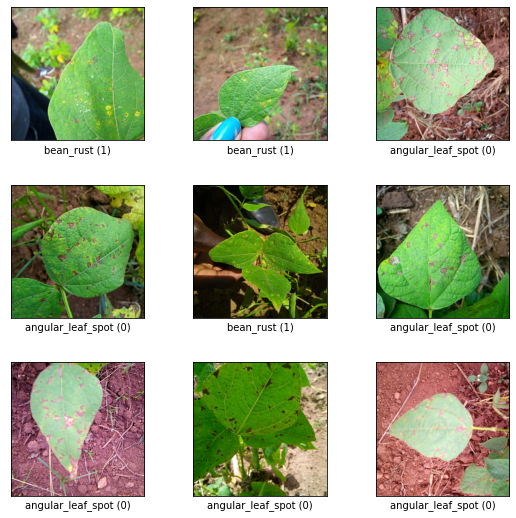

In [67]:
fig = tfds.show_examples(beans['train'], beans_info)

Labels are displayed as class name and numerical value.

Use **as_dataframe** to display examples:

,image,label
0,,1
1,,1
2,,0
3,,0

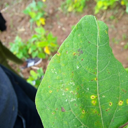
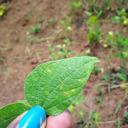
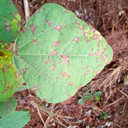
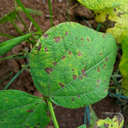

In [68]:
tfds.as_dataframe(beans['train'].take(4), info)

Let’s build a grid to display more examples. Begin by selecting images from the train set:

In [69]:
num = 30
images, labels = [], []
for feature, label in beans['train'].take(num):
  images.append(tf.squeeze(feature.numpy()))
  labels.append(label.numpy())

Create a function to display a grid of examples:

In [70]:
def display_grid(feature, target, n_rows, n_cols, cl):
  plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(feature[index], cmap='twilight',
                 interpolation='nearest')
      plt.axis('off')
      t = ' ('  + str(target[index]) + ')'
      plt.title(cl[target[index]] + t, fontsize=7.5)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)

Plot the grid:

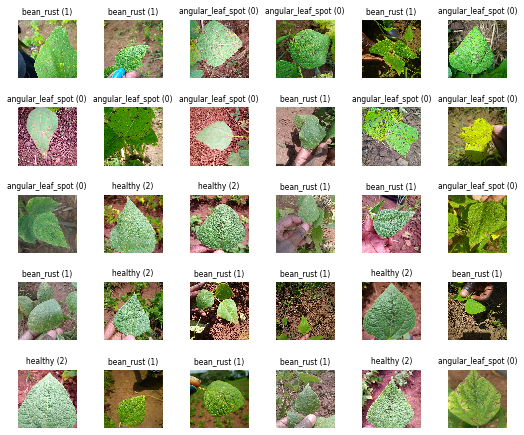

In [71]:
rows, cols = 5, 6
display_grid(images, labels, rows, cols, class_labels)

Display the first healthy bean:

healthy 2


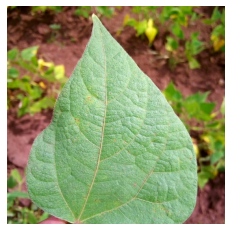

In [72]:
for img, lbl in beans['train'].take(30):
  if lbl.numpy() == 2:
    plt.imshow(img)
    plt.axis('off')
    print (class_labels[lbl.numpy()], end=' ')
    print (lbl.numpy())
    break

## Check Shapes

Check five examples to examine image shapes:

In [73]:
for i, example in enumerate(beans['train'].take(5)):
  print('Image {} shape: {} label: {}'.\
        format(i+1, example[0].shape, example[1]))

Image 1 shape: (500, 500, 3) label: 1
Image 2 shape: (500, 500, 3) label: 1
Image 3 shape: (500, 500, 3) label: 0
Image 4 shape: (500, 500, 3) label: 0
Image 5 shape: (500, 500, 3) label: 1


## Reformat

Resize to a smaller size for performance and scale:

In [75]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

Although shapes are of the same size, resize to a smaller size to improve modeling performance.

## Configure Dataset for Performance

Use buffered prefetching and caching to improve I/O performance.

Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step **s**, the input pipeline is reading the data for step **s+1**. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data. The tf.Dataset.prefetch transformation overlaps data preprocessing and model execution while training.

The tf.data.Dataset.cache transformation can cache a dataset, either in memory or on local storage. This save some operations (like file opening and data reading) from being executed during each epoch. Specifically, Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This ensures that the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Resource:

https://www.tensorflow.org/guide/data_performance

Build the input pipeline for train and test sets:

In [76]:
BATCH_SIZE = 32
SHUFFLE_SIZE = 500

train_batches = beans['train'].shuffle(SHUFFLE_SIZE).\
  map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

validation_batches = beans['test'].\
  map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

## Get Input Shape

Place input shape into a variable for use in the network model:

In [77]:
for img, lbl in train_batches.take(1):
  in_shape = img.shape[1:]
in_shape

TensorShape([224, 224, 3])

## Import New Libraries

Import libraries not already in memory:

In [78]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

## Clear Previous Models and Generate Seed

Clear previous models and generate seed with various tools:

In [79]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

## Create Model

Create a multilayered CNN model:

In [80]:
model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu',
         input_shape=in_shape, strides=1,
         kernel_regularizer='l1_l2'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(num_classes, activation='sigmoid')
])

## Compile

Compile with **tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)**:

In [81]:
loss = tf.keras.losses.\
       SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

## Train

Train for ten epochs:

In [82]:
epochs = 10
history = model.fit(
    train_batches, epochs=epochs,
    verbose=1, validation_data=validation_batches)

Epoch 1/10
33/33 [==============================] - 6s 71ms/step - loss: 2.2214 - accuracy: 0.3783 - val_loss: 1.3727 - val_accuracy: 0.5781
Epoch 2/10
33/33 [==============================] - 1s 28ms/step - loss: 1.3972 - accuracy: 0.5782 - val_loss: 1.1604 - val_accuracy: 0.6406
Epoch 3/10
33/33 [==============================] - 1s 28ms/step - loss: 1.1757 - accuracy: 0.6767 - val_loss: 1.0135 - val_accuracy: 0.7188
Epoch 4/10
33/33 [==============================] - 1s 28ms/step - loss: 1.0417 - accuracy: 0.7146 - val_loss: 0.9450 - val_accuracy: 0.7578
Epoch 5/10
33/33 [==============================] - 1s 28ms/step - loss: 0.9833 - accuracy: 0.7282 - val_loss: 0.8670 - val_accuracy: 0.7891
Epoch 6/10
33/33 [==============================] - 1s 28ms/step - loss: 0.8850 - accuracy: 0.7780 - val_loss: 0.9382 - val_accuracy: 0.6953
Epoch 7/10
33/33 [==============================] - 1s 28ms/step - loss: 0.8895 - accuracy: 0.7608 - val_loss: 0.9102 - val_accuracy: 0.7656
Epoch 8/10
33

## Predict

Make predictions based on the validation dataset because it has never been seen by the model. Build an input pipeline for the validation set to ready it for predictions.

In [83]:
validate = beans['validation'].\
  map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

Make predictions:

In [84]:
predictions = model.predict(validate)

Get the prediction for the first example:

In [85]:
first_prediction = tf.math.argmax(predictions[0])
class_labels[first_prediction.numpy()]

'healthy'

Get multiple predictions:

In [86]:
p = []
for row in range(8):
  pred = tf.math.argmax(predictions[row])
  p.append(pred.numpy())
  print ('class:', '(' + str(pred.numpy()) + ')', end=' ')
  print (class_labels[pred.numpy()])

class: (2) healthy
class: (1) bean_rust
class: (2) healthy
class: (1) bean_rust
class: (1) bean_rust
class: (1) bean_rust
class: (1) bean_rust
class: (2) healthy


Get an idea of model accuracy:

In [87]:
for i, (_, label) in enumerate(beans['validation'].take(8)):
  if label.numpy() == p[i]:
    print ('correct')
  else:
    print ('incorrect', end=' ')
    print ('actual:', label.numpy(), 'predicted:', p[i])

incorrect actual: 1 predicted: 2
correct
incorrect actual: 1 predicted: 2
correct
correct
correct
correct
correct
